In [3]:
import numpy as np
from sklearn import metrics
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import roc_curve, roc_auc_score
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from collections import Counter
import random

In [4]:
y_true = [0] * 20 + [1] * 20
print(y_true)
print(len(y_true))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40


In [5]:
yolo_model = YOLO("runs/detect/train45/weights/last.pt")

In [41]:
num_regions = 50
num_samples = 5

NL_slides = os.listdir("NL_region_sim")
AML_slides = os.listdir("AML_region_sim")


In [ ]:
acc_list = []

for i in range(num_samples):
    NL_correct = 0
    AML_correct = 0
    # run normal

    for slide_idx in NL_slides:
        image_list = os.listdir(f"NL_region_sim/{slide_idx}/focus_regions/high_mag_unannotated")
        random.shuffle(image_list)
        NL_total = 0
        AML_total = 0
        
        for img_name in image_list[0:num_regions]:
            pred_results = yolo_model(f"NL_region_sim/{slide_idx}/focus_regions/high_mag_unannotated/{img_name}")
            for i, res in enumerate(pred_results):
                ids = res.boxes.cls.cpu().numpy().astype(int)
                counts = Counter(res.names[id_] for id_ in ids)
            NL_count = counts.get("Typical")
            AML_count = counts.get("Atypical")
            if(NL_count != None):
                NL_total += NL_count
            if(AML_count != None):
                AML_total += AML_count
        blast_percent = AML_total / (NL_total + AML_total)
        if(blast_percent < 0.06):
            NL_correct += 1

    # run AML

    for slide_idx in AML_slides:
        image_list = os.listdir(f"AML_region_sim/{slide_idx}/focus_regions/high_mag_unannotated")
        random.shuffle(image_list)
        NL_total = 0
        AML_total = 0
        
        for img_name in image_list[0:num_regions]:
            pred_results = yolo_model(f"AML_region_sim/{slide_idx}/focus_regions/high_mag_unannotated/{img_name}")
            for i, res in enumerate(pred_results):
                ids = res.boxes.cls.cpu().numpy().astype(int)
                counts = Counter(res.names[id_] for id_ in ids)
            NL_count = counts.get("Typical")
            AML_count = counts.get("Atypical")
            if(NL_count != None):
                NL_total += NL_count
            if(AML_count != None):
                AML_total += AML_count
        blast_percent = AML_total / (NL_total + AML_total)
        if(blast_percent > 0.19):
            AML_correct += 1
    acc_list.append((NL_correct + AML_correct) / 40.0)
    print(NL_correct, AML_correct)

    print(f"Accuracy: {(NL_correct + AML_correct) / 40.0}")

print(acc_list)


image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_22_msk_slide_test.jpg: 1024x1024 7 Artifacts, 24 Typicals, 124.8ms
Speed: 13.2ms preprocess, 124.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_71_msk_slide_test.jpg: 1024x1024 7 Artifacts, 51 Typicals, 68.7ms
Speed: 11.4ms preprocess, 68.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_40_msk_slide_test.jpg: 1024x1024 3 Artifacts, 81 Typicals, 11.1ms
Speed: 7.1ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_17_msk_slide_test.jpg: 1024x1024 2 Artifacts, 43 Typicals, 11.2ms
Speed: 6.8ms preprocess, 11

In [42]:
auc_list = []

for i in range(num_samples):
    y_pred = []
    for slide_idx in NL_slides:
        image_list = os.listdir(f"NL_region_sim/{slide_idx}/focus_regions/high_mag_unannotated")
        random.shuffle(image_list)
        NL_total = 0
        AML_total = 0
        
        for img_name in image_list[0:num_regions]:
            pred_results = yolo_model(f"NL_region_sim/{slide_idx}/focus_regions/high_mag_unannotated/{img_name}")
            for i, res in enumerate(pred_results):
                ids = res.boxes.cls.cpu().numpy().astype(int)
                counts = Counter(res.names[id_] for id_ in ids)
            NL_count = counts.get("Typical")
            AML_count = counts.get("Atypical")
            if(NL_count != None):
                NL_total += NL_count
            if(AML_count != None):
                AML_total += AML_count
        blast_percent = AML_total / (NL_total + AML_total)
        y_pred.append(blast_percent)

    # run AML

    for slide_idx in AML_slides:
        image_list = os.listdir(f"AML_region_sim/{slide_idx}/focus_regions/high_mag_unannotated")
        random.shuffle(image_list)
        NL_total = 0
        AML_total = 0
        
        for img_name in image_list[0:num_regions]:
            pred_results = yolo_model(f"AML_region_sim/{slide_idx}/focus_regions/high_mag_unannotated/{img_name}")
            for i, res in enumerate(pred_results):
                ids = res.boxes.cls.cpu().numpy().astype(int)
                counts = Counter(res.names[id_] for id_ in ids)
            NL_count = counts.get("Typical")
            AML_count = counts.get("Atypical")
            if(NL_count != None):
                NL_total += NL_count
            if(AML_count != None):
                AML_total += AML_count
        blast_percent = AML_total / (NL_total + AML_total)
        y_pred.append(blast_percent)
    iter_auc = roc_auc_score(y_true, y_pred)
    auc_list.append(iter_auc)
    print(f"AUC: {iter_auc}")
    

print(auc_list)


image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_89_msk_slide_test.jpg: 1024x1024 5 Artifacts, 40 Typicals, 124.4ms
Speed: 13.5ms preprocess, 124.4ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_31_msk_slide_test.jpg: 1024x1024 86 Typicals, 108.6ms
Speed: 11.1ms preprocess, 108.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_41_msk_slide_test.jpg: 1024x1024 9 Artifacts, 43 Typicals, 67.8ms
Speed: 10.9ms preprocess, 67.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 c:\Users\ethan\Desktop\YOLOv8_project\NL_region_sim\0\focus_regions\high_mag_unannotated\0_91_msk_slide_test.jpg: 1024x1024 3 Artifacts, 1 Atypical, 23 Typicals, 11.4ms
Speed: 6.7ms preprocess, 

In [ ]:
NL_correct = 0
AML_correct = 0

# run normal

for slide_idx in NL_slides:
    image_list = os.listdir(f"NL_region_sim/{slide_idx}/focus_regions/high_mag_unannotated")
    NL_total = 0
    AML_total = 0
    
    for img_name in image_list[0:num_regions]:
        pred_results = yolo_model(f"NL_region_sim/{slide_idx}/focus_regions/high_mag_unannotated/{img_name}")
        for i, res in enumerate(pred_results):
            ids = res.boxes.cls.cpu().numpy().astype(int)
            counts = Counter(res.names[id_] for id_ in ids)
        NL_count = counts.get("Typical")
        AML_count = counts.get("Atypical")
        if(NL_count != None):
            NL_total += NL_count
        if(AML_count != None):
            AML_total += AML_count
    blast_percent = AML_total / (NL_total + AML_total)
    y_pred.append(blast_percent)
    if(blast_percent < 0.06):
        NL_correct += 1

# run AML

for slide_idx in AML_slides:
    image_list = os.listdir(f"AML_region_sim/{slide_idx}/focus_regions/high_mag_unannotated")
    NL_total = 0
    AML_total = 0
    
    for img_name in image_list[0:num_regions]:
        pred_results = yolo_model(f"AML_region_sim/{slide_idx}/focus_regions/high_mag_unannotated/{img_name}")
        for i, res in enumerate(pred_results):
            ids = res.boxes.cls.cpu().numpy().astype(int)
            counts = Counter(res.names[id_] for id_ in ids)
        NL_count = counts.get("Typical")
        AML_count = counts.get("Atypical")
        if(NL_count != None):
            NL_total += NL_count
        if(AML_count != None):
            AML_total += AML_count
    blast_percent = AML_total / (NL_total + AML_total)
    y_pred.append(blast_percent)
    if(blast_percent > 0.19):
        AML_correct += 1

print(NL_correct, AML_correct)

print(f"Accuracy: {(NL_correct + AML_correct) / 40.0}")

In [ ]:
print(y_pred)
auc_score_= roc_auc_score(y_true, y_pred)

In [ ]:
print(auc_score_)

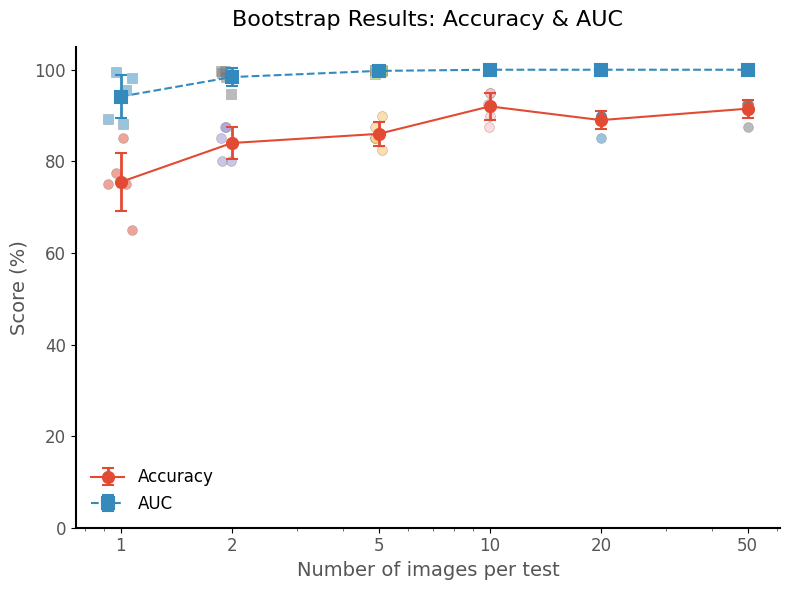

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n_images = np.array([1, 2, 5, 10, 20, 50])

accuracy_boot = np.array([
    [0.75,  0.775, 0.85,  0.75,  0.65],
    [0.85,  0.8,   0.875, 0.875, 0.8 ],
    [0.85,  0.9,   0.875, 0.85,  0.825],
    [0.875, 0.9,   0.95,  0.925, 0.95],
    [0.9,   0.9,   0.85,  0.9,   0.9 ],
    [0.925, 0.925, 0.925, 0.875, 0.925],
])

auc_boot = np.array([
    [0.8925, 0.995,  0.8825, 0.95625, 0.98125],
    [0.9975, 0.9925, 0.9850,  0.9975,  0.9475 ],
    [1.0,    1.0,    1.0,     0.99,    0.9975 ],
    [1.0,    1.0,    1.0,     1.0,     1.0    ],
    [1.0,    1.0,    1.0,     1.0,     1.0    ],
    [1.0,    1.0,    1.0,     1.0,     1.0    ],
])


acc_mean = accuracy_boot.mean(axis=1) * 100
acc_std  = accuracy_boot.std(axis=1)  * 100
auc_mean = auc_boot.mean(axis=1)      * 100
auc_std  = auc_boot.std(axis=1)       * 100


plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6)) 


fig.patch.set_facecolor('white')
ax.set_facecolor('white')


for xi, (acc_row, auc_row) in enumerate(zip(accuracy_boot, auc_boot)):
    x = n_images[xi]
    jitter = (np.random.rand(acc_row.size) - 0.5) * 0.3
    ax.scatter(x + jitter, acc_row * 100,
               alpha=0.5, marker='o', s=50, edgecolor='gray', linewidth=0.5)
    ax.scatter(x + jitter, auc_row * 100,
               alpha=0.5, marker='s', s=50, edgecolor='gray', linewidth=0.5)

ax.errorbar(n_images, acc_mean, yerr=acc_std,
            fmt='o-', capsize=4, elinewidth=2, markeredgewidth=1.5,
            markersize=8, label='Accuracy')
ax.errorbar(n_images, auc_mean, yerr=auc_std,
            fmt='s--', capsize=4, elinewidth=2, markeredgewidth=1.5,
            markersize=8, label='AUC')


ax.set_xscale('log')
ax.set_xticks(n_images)
ax.set_xticklabels(n_images, fontsize=12)
ax.set_ylim(0, 105)
ax.set_xlabel('Number of images per test', fontsize=14)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_title('Bootstrap Results: Accuracy & AUC', fontsize=16, pad=15)
ax.grid(False)


for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    sp = ax.spines[spine]
    sp.set_visible(True)
    sp.set_color('black')
    sp.set_linewidth(1.5)

ax.tick_params(axis='both', which='major', labelsize=12, color='black')
ax.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.show()


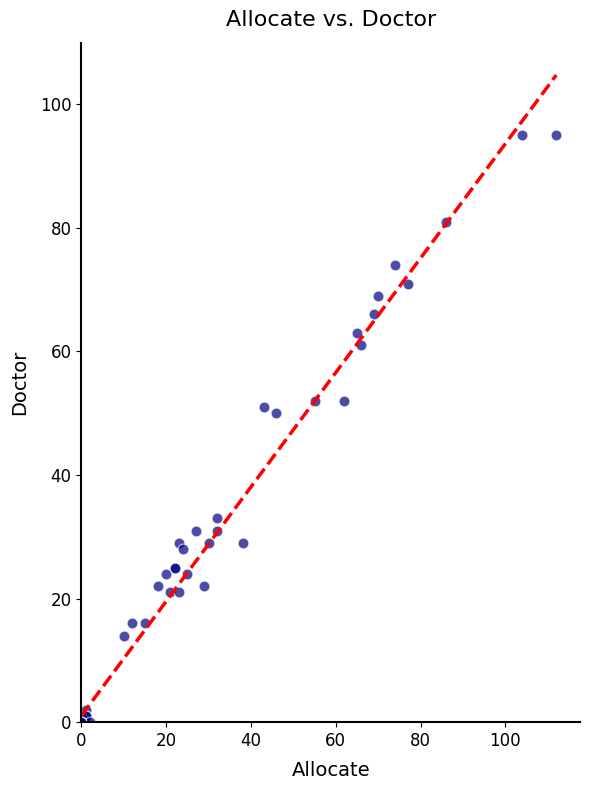

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


allocate = np.array([
    21, 29, 20, 25, 22, 55, 23, 18, 15, 62,
    69, 10, 27, 32, 30,112, 86, 22, 12, 24, 32,
    65, 23, 70, 77, 38, 43, 66, 74, 46,104,
     0,  1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,
     0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
     0,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0
])
doctor = np.array([
    21, 22, 24, 24, 25, 52, 29, 22, 16, 52,
    66, 14, 31, 31, 29, 95, 81, 25, 16, 28, 33,
    63, 21, 69, 71, 29, 51, 61, 74, 50, 95,
     0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,
     0,  2,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
     0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0
])

coeffs = np.polyfit(allocate, doctor, 1)
fit_fn = np.poly1d(coeffs)


x_line = np.linspace(0, allocate.max(), 200)
y_line = fit_fn(x_line)


fig, ax = plt.subplots(figsize=(6, 8), facecolor='white')
ax.set_facecolor('white')

ax.scatter(
    allocate, doctor,
    s=60, alpha=0.7,
    color='navy',
    edgecolor='white', linewidth=0.8
)
ax.plot(
    x_line, y_line,
    color='red', linestyle='--', linewidth=2.5
)


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)


ax.set_xlabel('Allocate', fontsize=14, labelpad=8)
ax.set_ylabel('Doctor',   fontsize=14, labelpad=8)
ax.set_title('Allocate vs. Doctor', fontsize=16, pad=12)

ax.grid(False)
for sp in ['top', 'right']:
    ax.spines[sp].set_visible(False)
for sp in ['bottom', 'left']:
    ax.spines[sp].set_linewidth(1.5)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()